In [103]:
#Import the python libraries
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image
import seaborn as sns
import matplotlib.font_manager as fm

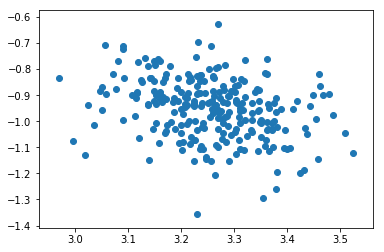

In [104]:
data=np.genfromtxt('mull_ex_vs_charges_noIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
plt.scatter(X,Y)
    

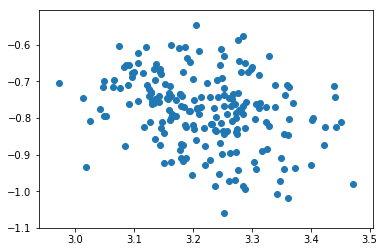

In [105]:
data=np.genfromtxt('mull_charge_ex_final_CIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
plt.scatter(X,Y)

(array([-1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4]),
 <a list of 7 Text yticklabel objects>)

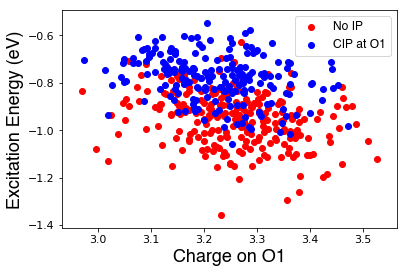

In [121]:
data=np.genfromtxt('mull_ex_vs_charges_noIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
plt.scatter(X,Y,color='red',label="No IP")

data=np.genfromtxt('mull_charge_ex_final_CIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
plt.scatter(X,Y,color='blue',label="CIP at O1")

fontprop=fm.FontProperties(fname='/Library/Fonts/helvetica.ttf',size=12)
plt.legend(prop=fontprop)
plt.xlabel("Charge on O1",fontproperties=fontprop,fontsize=18)
plt.ylabel("Excitation Energy (eV)",fontproperties=fontprop,fontsize=18)
plt.xticks(fontsize=11,fontproperties=fontprop)
plt.yticks(fontsize=11,fontproperties=fontprop)

best fit line:
y = 0.11 + -0.33x
best fit line:
y = 0.19 + -0.30x


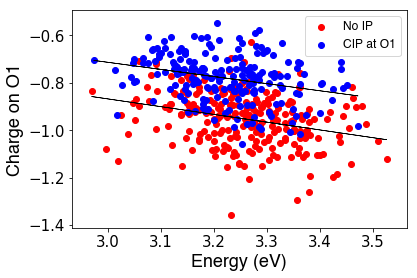

In [122]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

data=np.genfromtxt('mull_ex_vs_charges_noIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
plt.scatter(X,Y,color='red',label="No IP")
a, b = best_fit(X,Y)
yfit = [a+b*xi for xi in X]
plt.plot(X,yfit,linestyle='-',linewidth=0.7,color="black")


data=np.genfromtxt('mull_charge_ex_final_CIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
plt.scatter(X,Y,color='blue',label="CIP at O1")
a, b = best_fit(X,Y)
yfit = [a+b*xi for xi in X]
plt.plot(X,yfit,linestyle='-',linewidth=0.7,color="black")
plt.legend(prop=fontprop,frameon=True)
plt.ylabel("Charge on O1",fontproperties=fontprop,fontsize=18)
plt.xlabel("Energy (eV)",fontproperties=fontprop,fontsize=18)
plt.xticks(fontsize=15,fontproperties=fontprop)
plt.yticks(fontsize=15,fontproperties=fontprop)
plt.savefig(os.getcwd()+'/scatter_plot.png',dpi=300,bbox_inches='tight');

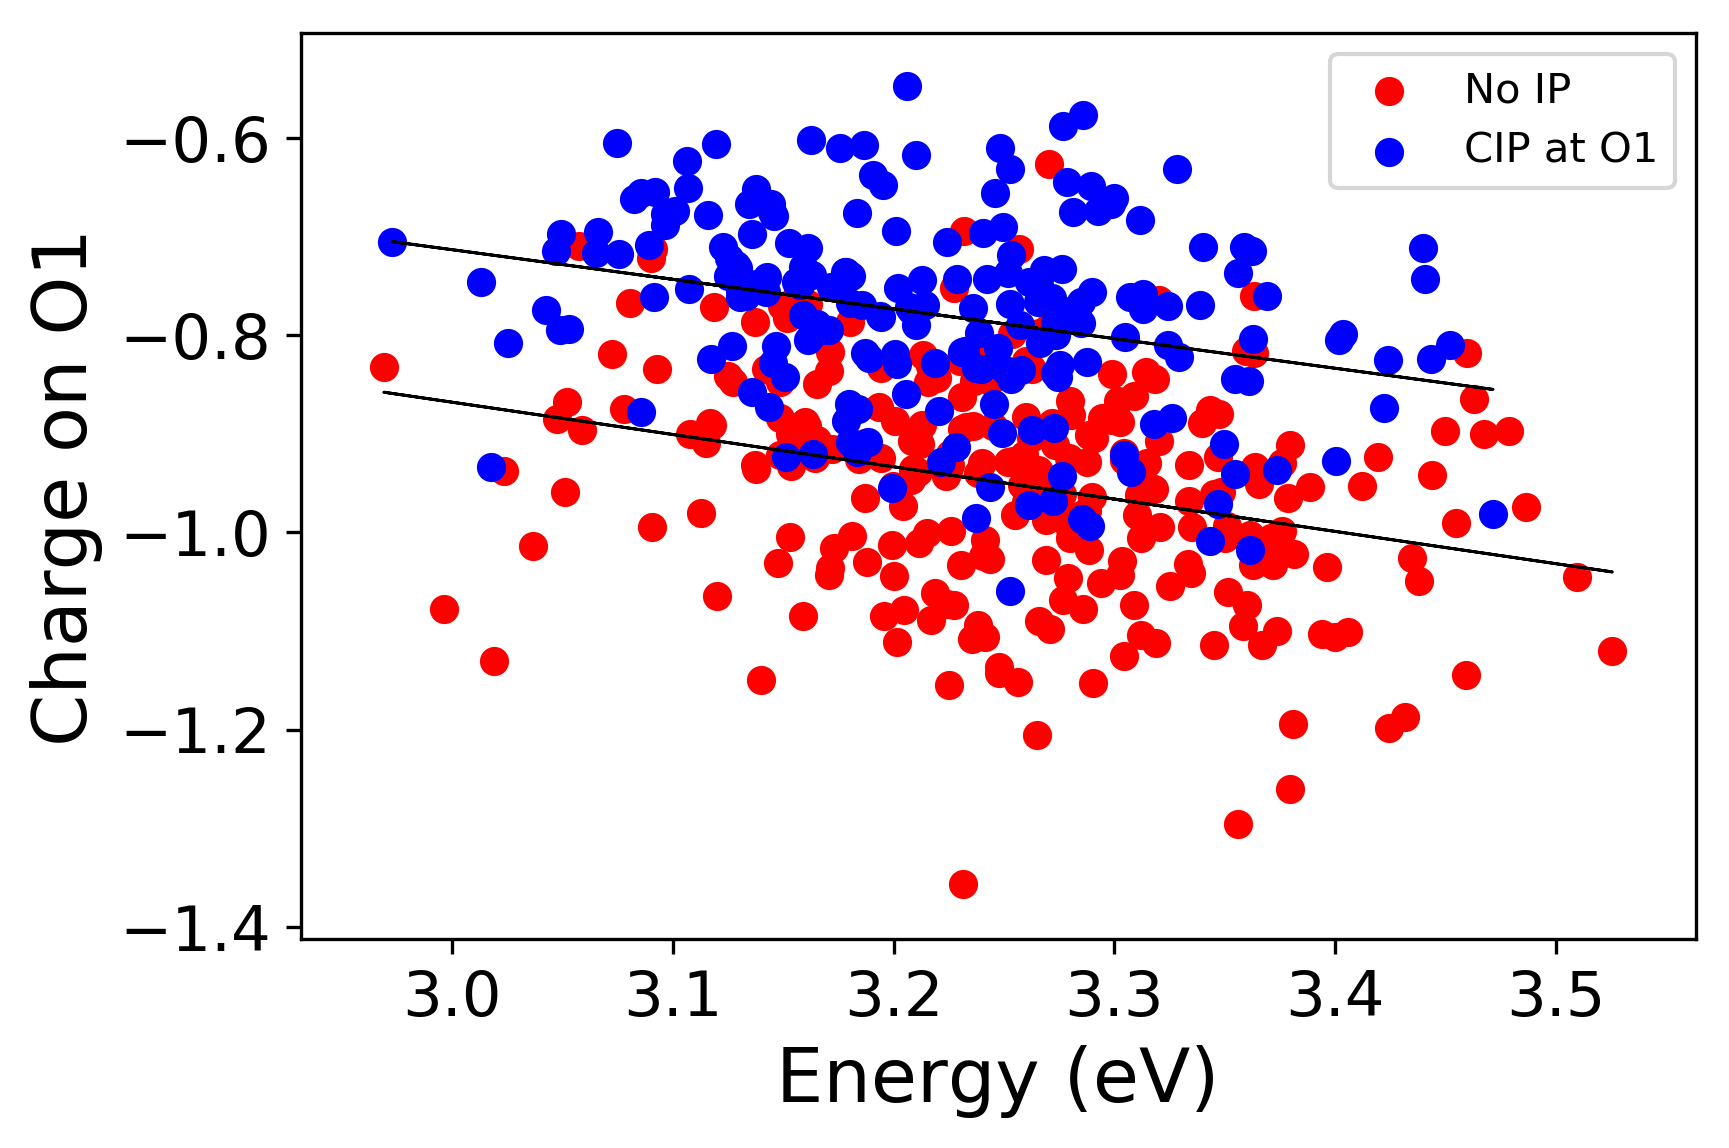

In [123]:
Image(filename=os.getcwd()+"/spectra_compare.png")

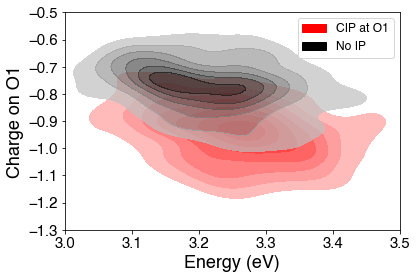

In [127]:
data=np.genfromtxt('mull_ex_vs_charges_noIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
sns.kdeplot(X,Y,color="red",n_levels=7,shade=True,shade_lowest=False,label="CIP at O1")

data=np.genfromtxt('mull_charge_ex_final_CIP_ex1st',usecols=(1,2),skip_header=1)
X=data[:,0]
Y=data[:,1]
sns.kdeplot(X,Y,color="black",n_levels=7,alpha=0.7,shade=True,shade_lowest=False,label="No IP")
plt.legend(prop=fontprop,frameon=True)
plt.ylabel("Charge on O1",fontproperties=fontprop,fontsize=18)
plt.xlabel("Energy (eV)",fontproperties=fontprop,fontsize=18)
plt.xlim(3.0,3.5)
plt.ylim(-1.3,-0.5)
plt.xticks(fontproperties=fontprop,fontsize=15)
plt.yticks(fontproperties=fontprop,fontsize=15)
plt.savefig(os.getcwd()+'/kde_plot.png',dpi=300,bbox_inches='tight');